# Linear Regression: Inverse Matrix Method

This script explores how to accomplish linear regression with TensorFlow using the matrix inverse.

Given the system $ A \cdot x = y $, the matrix inverse way of linear regression (equations for overdetermined systems) is given by solving for x as follows.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

As a reminder, here, $x$ is our parameter matrix (vector of length $F+1$, where $F$ is the number of features). Here, $A$, our design matrix takes the form

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

Where $F$ is the number of independent features, and $n$ is the number of points.  For an overdetermined system, $n>F$. Remember that one observed point in our system will have length $F+1$ and the $i^{th}$ point will look like

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$

For this recipe, we will consider only a 2-dimensional system ($F=1$), so that we can plot the results at the end.

We start by loading the necessary libraries.

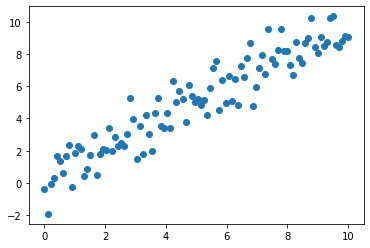

In [6]:
# Linear Regression using Matrix Inverse

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Create the data
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

plt.scatter(x_vals,y_vals)


In [10]:

# Create design matrix
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

# Format the y matrix
y = np.transpose(np.matrix(y_vals))

# Create tensors
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

# Matrix inverse solution
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.linalg.inv(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, y_tensor)

slope = solution[0][0]
y_intercept = solution[1][0]
print("Sole= {0} and y_intercept = {1}".format(slope,y_intercept))

Sole= 0.9533809847841552 and y_intercept = 0.31536024782101924


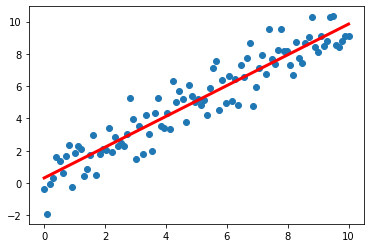

In [9]:

best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    
plt.plot(x_vals,y_vals,'o',label = 'Data')
plt.plot(x_vals,best_fit,'r-',label='Best fit Line',linewidth =3)
plt.show()
